In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **About the Dataset**

##Netflix popular movies dataset

This data is all about Movies That are available on Netflix Website movies title, cast of the movie,desc of movies, duration, rating on IMDB, voted by people, year, genre, certificate

This dataset comes from the IMDB website data is collected by using web scraping (it wasn't me that makes the web scraping)

> Source: https://www.kaggle.com/datasets/narayan63/netflix-popular-movies-dataset




## Importing the dataset

In [150]:
dataset = pd.read_csv('n_movies.csv', sep = ',') # importing the dataset with using the comma as separator
dataset.head(5)                                  # showing the five firsts lines with the dataset

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


# **General condition of the dataset analysis** *texto em itálico*

## Dataset shape

In [151]:
dataset.shape # looking the quantities of lines and columns have in this dataset

(9957, 9)

In [152]:
dataset.info() # looking the data type of each column and how many values nulls have in this dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


**Insight 1:**

> The column "ratings" is the only column that the data type is float numbers. The others is strings.


> The columns "title", "description" and "stars" are full completed. The others haves null campes.





## Handling data-type errors

In [153]:
dataset.votes = dataset.votes.str.replace(',', '').astype(float) 

In [154]:
dataset.head(1)

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031.0


In [155]:
dataset.info() # looking again the data-types to confirme if the transform above it worked out

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   float64
dtypes: float64(2), object(7)
memory usage: 700.2+ KB


Yes, it worked! Now it remains to transform the others.

In [156]:
dataset.duration = dataset.duration.str.replace(' min', '').astype(float) 

In [157]:
dataset.head(1) # It worked!

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30.0,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031.0


In [158]:
dataset.year.unique() # Looking the all values that the column "year" have.

array(['(2018– )', '(2016– )', '(2015–2022)', '(2022)', '(2022– )',
       '(2013– )', '(2008–2013)', '(II) (2022)', '(2010–2022)',
       '(2013–2022)', '(2021– )', '(2001)', '(2005– )', '(2005–2020)',
       '(2011– )', '(2003– )', '(1994–2004)', '(2011–2021)',
       '(2009–2020)', '(2017–2022)', '(2011–2019)', '(2013–2020)',
       '(2019– )', '(1989–1998)', '(2016–2021)', '(2019–2023)',
       '(2013–2021)', '(2000–2007)', '(2014– )', '(2015– )',
       '(2020–2023)', '(2013–2023)', '(2020–2022)', '(2017–2020)',
       '(2003)', '(2009–2017)', '(1999– )', '(2016–2022)', '(2005–2014)',
       '(2009–2015)', '(2015–2018)', '(2010– )', '(2015–2020)', '(2021)',
       '(2002)', '(2000)', '(2012)', '(2017– )', '(2008–2014)',
       '(2007–2015)', '(2014–2023)', '(2009– )', '(2015–2019)',
       '(1998–2006)', '(2020)', '(1997)', '(2020– )', '(2010–2017)',
       '(2006–2013)', '(2011–2018)', '(2019)', '(2010–2015)',
       '(2001–2017)', '(1987–1994)', '(2014–2020)', '(2017–2021)',
   

The most values in the "year" column is irregular.

In [159]:
dataset.year.fillna('0000', inplace=True)

In [160]:
dataset.year.unique() # Checking if work out. And it worked out!

array(['(2018– )', '(2016– )', '(2015–2022)', '(2022)', '(2022– )',
       '(2013– )', '(2008–2013)', '(II) (2022)', '(2010–2022)',
       '(2013–2022)', '(2021– )', '(2001)', '(2005– )', '(2005–2020)',
       '(2011– )', '(2003– )', '(1994–2004)', '(2011–2021)',
       '(2009–2020)', '(2017–2022)', '(2011–2019)', '(2013–2020)',
       '(2019– )', '(1989–1998)', '(2016–2021)', '(2019–2023)',
       '(2013–2021)', '(2000–2007)', '(2014– )', '(2015– )',
       '(2020–2023)', '(2013–2023)', '(2020–2022)', '(2017–2020)',
       '(2003)', '(2009–2017)', '(1999– )', '(2016–2022)', '(2005–2014)',
       '(2009–2015)', '(2015–2018)', '(2010– )', '(2015–2020)', '(2021)',
       '(2002)', '(2000)', '(2012)', '(2017– )', '(2008–2014)',
       '(2007–2015)', '(2014–2023)', '(2009– )', '(2015–2019)',
       '(1998–2006)', '(2020)', '(1997)', '(2020– )', '(2010–2017)',
       '(2006–2013)', '(2011–2018)', '(2019)', '(2010–2015)',
       '(2001–2017)', '(1987–1994)', '(2014–2020)', '(2017–2021)',
   

In [161]:
# Creating the list of the inconcistences to remove of the column "year" ahead
list_to_remove = [' ', 'Video', 'video', '-', '–', '(',')','TV','I','V','X','L', 'T',
                  'nan','Movie','Special', 'Short','Podcast','Series', 'Music','Game']

In [162]:
# I couldn't use the list to replace, so i used the loop traversing the list.
for l in list_to_remove:
  dataset.year = dataset.year.str.replace(l, '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [163]:
dataset.year.unique() # Checking if it worked out. And it worked out!

array(['2018', '2016', '20152022', '2022', '2013', '20082013', '20102022',
       '20132022', '2021', '2001', '2005', '20052020', '2011', '2003',
       '19942004', '20112021', '20092020', '20172022', '20112019',
       '20132020', '2019', '19891998', '20162021', '20192023', '20132021',
       '20002007', '2014', '2015', '20202023', '20132023', '20202022',
       '20172020', '20092017', '1999', '20162022', '20052014', '20092015',
       '20152018', '2010', '20152020', '2002', '2000', '2012', '2017',
       '20082014', '20072015', '20142023', '2009', '20152019', '19982006',
       '2020', '1997', '20102017', '20062013', '20112018', '20102015',
       '20012017', '19871994', '20142020', '20172021', '20132019', '1993',
       '20052017', '1975', '20102013', '1995', '20172019', '19841996',
       '20002015', '20032019', '2007', '20152017', '20112020', '20042022',
       '20102020', '19661969', '2008', '20092016', '20192022', '1976',
       '20112017', '1994', '20122020', '20162020', '19821

In [164]:
years = dataset.year
years_corrects = []
for year in years:
  years_corrects.append(year[-4::]) 
years_corrects

['2018',
 '2016',
 '2022',
 '2022',
 '2022',
 '2022',
 '2013',
 '2013',
 '2022',
 '2022',
 '2016',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2022',
 '2021',
 '2001',
 '2005',
 '2020',
 '2011',
 '2022',
 '2003',
 '2004',
 '2021',
 '2020',
 '2022',
 '2022',
 '2022',
 '2022',
 '2019',
 '2020',
 '2019',
 '2013',
 '1998',
 '2021',
 '2023',
 '2022',
 '2022',
 '2022',
 '2019',
 '2021',
 '2021',
 '2007',
 '2014',
 '2015',
 '2023',
 '2023',
 '2018',
 '2022',
 '2022',
 '2020',
 '2022',
 '2019',
 '2003',
 '2017',
 '2019',
 '1999',
 '2014',
 '2022',
 '2022',
 '2014',
 '2022',
 '2022',
 '2022',
 '2015',
 '2018',
 '2010',
 '2013',
 '2022',
 '2020',
 '2021',
 '2022',
 '2021',
 '2021',
 '2002',
 '2022',
 '2022',
 '2000',
 '2012',
 '2022',
 '2017',
 '2014',
 '2015',
 '2023',
 '2009',
 '2022',
 '2019',
 '2006',
 '2018',
 '2022',
 '2020',
 '2022',
 '1997',
 '2020',
 '2017',
 '2013',
 '2018',
 '2022',
 '2022',
 '2019',
 '2017',
 '2015',
 '2022',
 '2017',
 '1994',
 '2020',
 '2019',
 

In [165]:
len(years_corrects) # Checking the size of the list to see if it has the year column row quantities in the dataset

9957

In [166]:
dataset.year = years_corrects # Replacing the original rows with the treated list

In [167]:
dataset.year.unique()

array(['2018', '2016', '2022', '2013', '2021', '2001', '2005', '2020',
       '2011', '2003', '2004', '2019', '1998', '2023', '2007', '2014',
       '2015', '2017', '1999', '2010', '2002', '2000', '2012', '2009',
       '2006', '1997', '1994', '1993', '1975', '1995', '1996', '1969',
       '2008', '1976', '1991', '1978', '1968', '1989', '0000', '1980',
       '1971', '1984', '1990', '1962', '1961', '1987', '1979', '', '1988',
       '1960', '1983', '1956', '1992', '1974', '1941', '2024', '1986',
       '1967', '1966', '1958', '1932', '1957', '1946', '1950', '1973',
       '1952', '1955', '1954', '2025', '1947', '1948', '1970', '1982',
       '1985', '1945', '1964', '1977', '1965', '1972', '1953', '1963',
       '1935', '1934', '1944', '1959', '1938', '1933'], dtype=object)

In [168]:
dataset.year = dataset.year.replace('', np.nan).astype(float)

In [169]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9853 non-null   float64
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   float64
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   float64
dtypes: float64(4), object(5)
memory usage: 700.2+ KB


In [170]:
dataset.head() # Checking if it was worked. And it worked!

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,2018.0,TV-14,30.0,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031.0
1,The Crown,2016.0,TV-MA,58.0,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885.0
2,Better Call Saul,2022.0,TV-MA,46.0,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384.0
3,Devil in Ohio,2022.0,TV-MA,356.0,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...",9773.0
4,Cyberpunk: Edgerunners,2022.0,TV-MA,24.0,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...",15413.0


I decided convert the year column in integer rather than data because we haves only year and not the completed date.

## Splitting genres column

It was necessary split the cinematic genres column so that genres could be analyzed individually later

In [171]:
expand_genres = dataset['genre'].str.split(", ", n = 2, expand = True) # Splitting the genres column
for genre in range(0,3): # Creating the new genres columns individually
  dataset[f'genre{genre}'] = expand_genres[genre]
dataset.head()

,title,year,certificate,duration,genre,rating,description,stars,votes,genre0,genre1,genre2
0,Cobra Kai,2018.0,TV-14,30.0,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031.0,Action,Comedy,Drama
1,The Crown,2016.0,TV-MA,58.0,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885.0,Biography,Drama,History
2,Better Call Saul,2022.0,TV-MA,46.0,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384.0,Crime,Drama,None
3,Devil in Ohio,2022.0,TV-MA,356.0,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...",9773.0,Drama,Horror,Mystery
4,Cyberpunk: Edgerunners,2022.0,TV-MA,24.0,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...",15413.0,Animation,Action,Adventure


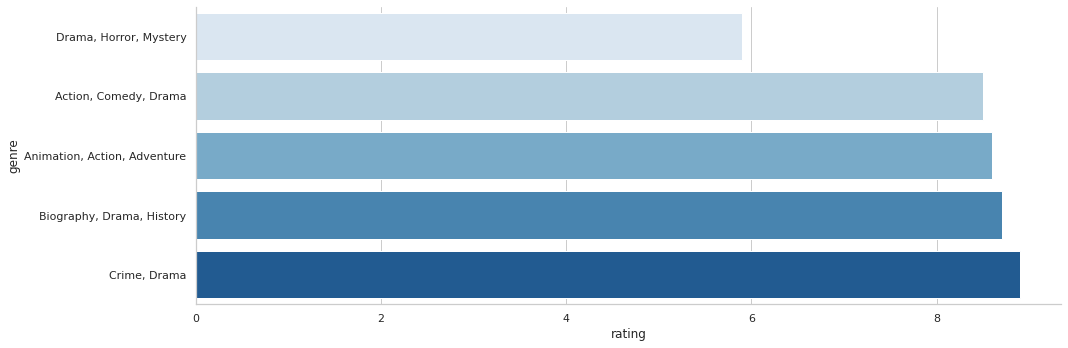

In [172]:
sns.set_theme(context='notebook', style='whitegrid', font_scale=1, color_codes=True)
sns.set_palette("Blues", 5)

ax = sns.catplot(data = dataset.head().sort_values(by = 'rating'), x = 'rating', y = 'genre',
                 kind='bar', height=5, aspect=3)

# Starting analysis

## Ratings statistics

#### Rating column boxplot

Let's see a ratings column boxplot to visualize the outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


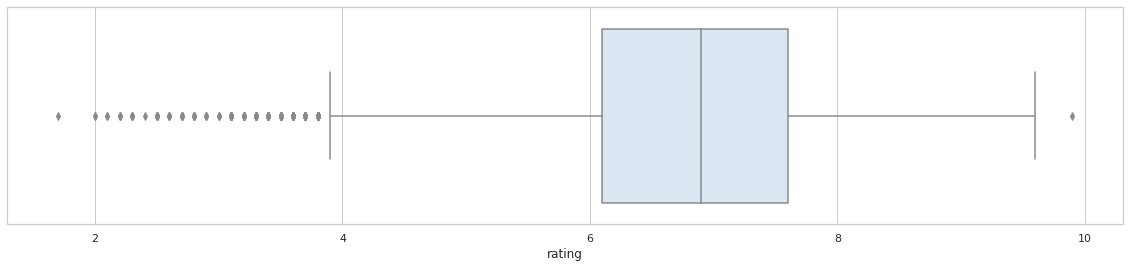

In [173]:
plt.figure(figsize = (20,4))
sns.boxplot(dataset['rating'])

In [174]:
dataset['rating'].min() # The minor note

1.7

In [175]:
dataset.query("rating == 1.7") # There is only one rating of the movie that has the lowest rating

,title,year,certificate,duration,genre,rating,description,stars,votes,genre0,genre1,genre2
6633,Defcon 2012,2010.0,Not Rated,92.0,Sci-Fi,1.7,"On October 30, 2009 an independent filmmaker a...","['R. Christian Anderson', '| ', ' Stars:', ...",407.0,Sci-Fi,None,None


In [176]:
dataset['title'].value_counts()

Top Gear                                        92
Bleach                                          67
The Queen and the Conqueror                     61
Avatar: The Last Airbender                      54
Johnny Test                                     34
                                                ..
Investigation Partners                           1
Really Love                                      1
The Seven Husbands of Evelyn Hugo                1
High Flying Bird                                 1
Winning Time: The Rise of the Lakers Dynasty     1
Name: title, Length: 7912, dtype: int64

In [177]:
dataset['n'] = 1 # Creating a temporary column with 1 for to estimate and remove the movies that have only one rating
dataset.head(3)

,title,year,certificate,duration,genre,rating,description,stars,votes,genre0,genre1,genre2,n
0,Cobra Kai,2018.0,TV-14,30.0,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031.0,Action,Comedy,Drama,1
1,The Crown,2016.0,TV-MA,58.0,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885.0,Biography,Drama,History,1
2,Better Call Saul,2022.0,TV-MA,46.0,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384.0,Crime,Drama,None,1


In [178]:
less_six = dataset[['title', 'rating']].query("rating < 6").drop('rating', axis = 1) # Filtering movies
less_six = less_six.index.to_list() # Converting to list
dataset.drop(less_six, inplace = True) # Dropping movies from the list

In [179]:
less_ten = dataset[['title', 'n']].groupby('title', as_index = False).sum().sort_values(by = 'n', ascending=False) # Groupping the movies summing the "n" column
less_ten = less_ten.query("n < 10") # Filtering the movies that has less than 10 rantings
less_ten['title']

1122                                Dash & Lily
642                               Blood of Zeus
611                             Black Lightning
4634    The Expanding Universe of Ashley Garcia
716                                  Bridgerton
                         ...                   
2049                                    Houdini
2048      Hotel Transylvania 3: Summer Vacation
2047                               Hotel Mumbai
2045                           Hotaru no hikari
5966                                     Ówàmbé
Name: title, Length: 5889, dtype: object

In [180]:
less_ten = less_ten.title.to_list() # Corverting to list
len(less_ten) # Conferring the rows number

5889

In [181]:
dataset.set_index('title', inplace = True)
dataset.head()

,year,certificate,duration,genre,rating,description,stars,votes,genre0,genre1,genre2,n
title,,,,,,,,,,,,
Cobra Kai,2018.0,TV-14,30.0,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031.0,Action,Comedy,Drama,1
The Crown,2016.0,TV-MA,58.0,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885.0,Biography,Drama,History,1
Better Call Saul,2022.0,TV-MA,46.0,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384.0,Crime,Drama,None,1
Cyberpunk: Edgerunners,2022.0,TV-MA,24.0,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...",15413.0,Animation,Action,Adventure,1
The Sandman,2022.0,TV-MA,45.0,"Drama, Fantasy, Horror",7.8,Upon escaping after decades of imprisonment by...,"['Tom Sturridge, ', 'Boyd Holbrook, ', 'Patton...",116358.0,Drama,Fantasy,Horror,1


There's most movies that has only one rating

In [182]:
dataset.drop(less_ten, inplace = True) # Dropping the movies that has only one rating
dataset.head()

,year,certificate,duration,genre,rating,description,stars,votes,genre0,genre1,genre2,n
title,,,,,,,,,,,,
Cobra Kai,2018.0,TV-14,30.0,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031.0,Action,Comedy,Drama,1
The Sandman,2022.0,TV-MA,45.0,"Drama, Fantasy, Horror",7.8,Upon escaping after decades of imprisonment by...,"['Tom Sturridge, ', 'Boyd Holbrook, ', 'Patton...",116358.0,Drama,Fantasy,Horror,1
Rick and Morty,2013.0,TV-MA,23.0,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"['Justin Roiland, ', 'Chris Parnell, ', 'Spenc...",502160.0,Animation,Adventure,Comedy,1
Stranger Things,2016.0,TV-14,51.0,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...","['Millie Bobby Brown, ', 'Finn Wolfhard, ', 'W...",1149889.0,Drama,Fantasy,Horror,1
Lucifer,2021.0,TV-14,42.0,"Crime, Drama, Fantasy",8.1,Lucifer Morningstar has decided he's had enoug...,"['Tom Ellis, ', 'Lauren German, ', 'Kevin Alej...",318928.0,Crime,Drama,Fantasy,1


In [183]:
dataset.shape # Conferring if it worked. And worked out!

(1255, 12)

In [184]:
dataset.drop('n', axis = 1, inplace = True) # Dropping the "n" column, it will no longer be used.
dataset.reset_index(inplace = True)
dataset.head()

,title,year,certificate,duration,genre,rating,description,stars,votes,genre0,genre1,genre2
0,Cobra Kai,2018.0,TV-14,30.0,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031.0,Action,Comedy,Drama
1,The Sandman,2022.0,TV-MA,45.0,"Drama, Fantasy, Horror",7.8,Upon escaping after decades of imprisonment by...,"['Tom Sturridge, ', 'Boyd Holbrook, ', 'Patton...",116358.0,Drama,Fantasy,Horror
2,Rick and Morty,2013.0,TV-MA,23.0,"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"['Justin Roiland, ', 'Chris Parnell, ', 'Spenc...",502160.0,Animation,Adventure,Comedy
3,Stranger Things,2016.0,TV-14,51.0,"Drama, Fantasy, Horror",8.7,"When a young boy disappears, his mother, a pol...","['Millie Bobby Brown, ', 'Finn Wolfhard, ', 'W...",1149889.0,Drama,Fantasy,Horror
4,Lucifer,2021.0,TV-14,42.0,"Crime, Drama, Fantasy",8.1,Lucifer Morningstar has decided he's had enoug...,"['Tom Ellis, ', 'Lauren German, ', 'Kevin Alej...",318928.0,Crime,Drama,Fantasy


### Rating column boxplot after remove movies with less than 10 ratings

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


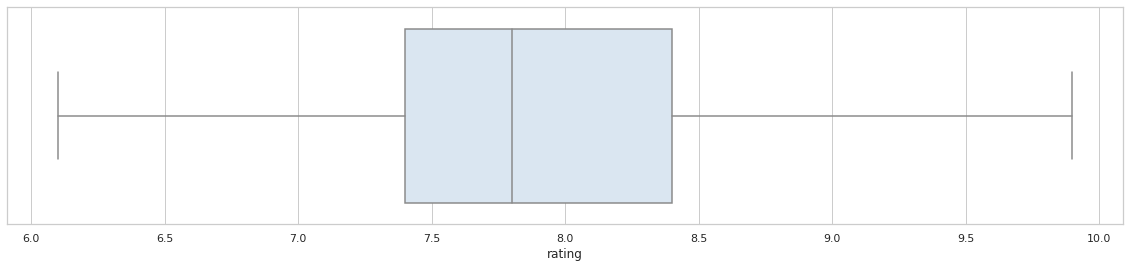

In [185]:
plt.figure(figsize = (20,4))
ax = sns.boxplot(dataset['rating'])

### Dropping the outliers

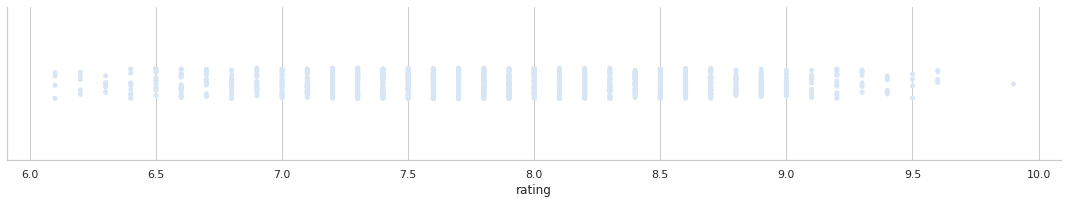

In [186]:
ax = sns.catplot(data = dataset, x = 'rating', height=3, aspect=5) # Ratings scatterplot

There are some classifications of outliers. I will remove reviews with less than 5 reviews.

In [187]:
less_six = dataset[['title', 'rating']].query("rating < 6").drop('rating', axis = 1) # Filtering movies
less_six = less_six.index.to_list() # Converting to list
dataset.drop(less_six, inplace = True) # Dropping movies from the list

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


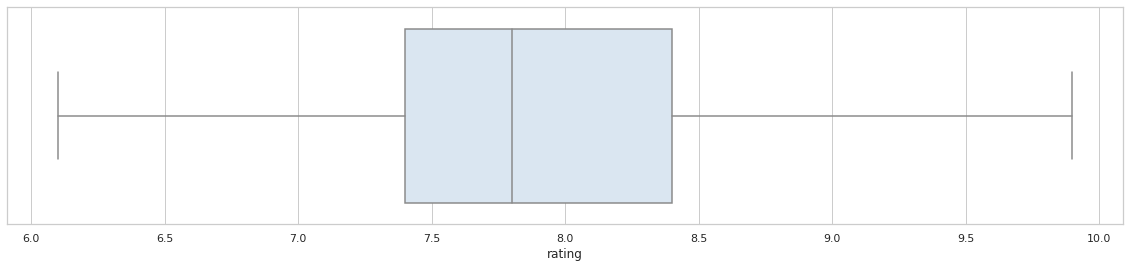

In [188]:
plt.figure(figsize = (20,4))
ax = sns.boxplot(dataset['rating'])

## Which genres appeared the most?

In [189]:
# Joining all genres in one column
genres_list = dataset.genre0.to_list() + dataset.genre1.to_list() + dataset.genre2.to_list()
len(genres_list) # Checking if it worked. And it worked!

3765

In [190]:
df_genres = pd.DataFrame({'genre': genres_list}) # Creating a dataframe with the above list
df_genres.reset_index(inplace=True) # Recreating a new index column and setting the value of this column for 1 for it to be groupe later
df_genres['index'] = 1
df_genres.rename(columns= {'index': 'count'}, inplace = True)
df_genres = df_genres.groupby('genre', as_index=False).sum().sort_values(by = 'count', ascending = False)
df_genres.head()

,genre,count
6,Drama,561
0,Action,481
1,Adventure,463
3,Comedy,409
2,Animation,391


####R: The genres Drama and Comedy has been the most appeared.

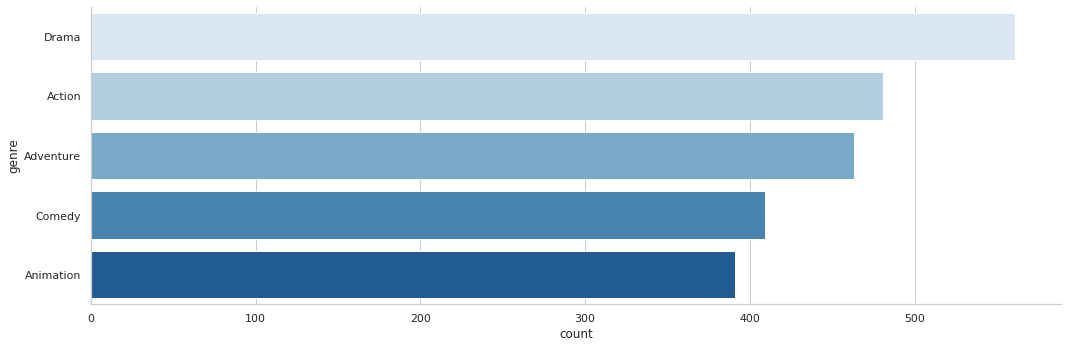

In [191]:
sns.set_theme(context='notebook', style='whitegrid', font_scale=1, color_codes=True)
sns.set_palette("Blues", 5)
ax = sns.catplot(data = df_genres.head(), x = 'count', y = 'genre', kind='bar', height=5, aspect=3)

## What movies that most has been evaluated?



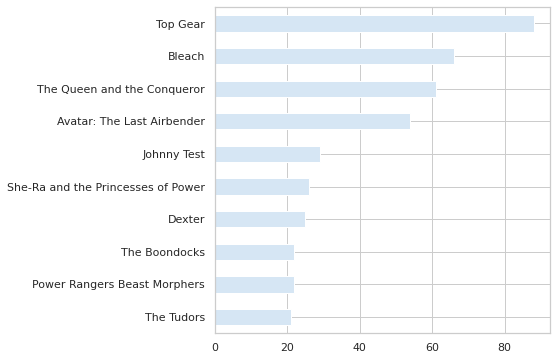

In [192]:
sns.set_theme(context='notebook', style='whitegrid', font_scale=1, color_codes=True)
sns.set_palette("Blues", 5)
dataset['title'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', figsize=(6,6))

####R: Top Gear, Bleach, The Queens and the Conqueror, Avatar: The Last Airbender and Johnny Test

## Which movies have received the highest ratings?

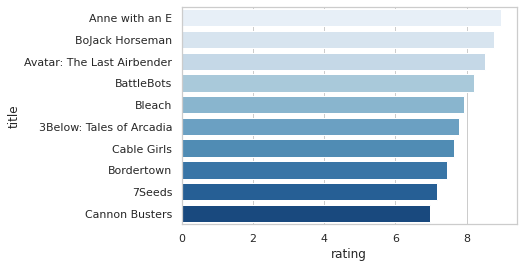

In [193]:
sns.set_theme(context='notebook', style='whitegrid', font_scale=1, color_codes=True)
sns.set_palette("Blues", 10)
ax = sns.barplot(data = dataset.groupby('title', as_index = False).mean().head(10).sort_values(by = 'rating', ascending = False), x = "rating", y = 'title')

####R: Anne with an E, Bojack Horseman, Avatar: The Last Airbender, BatteBots, Bleach.

## Year column boxplot

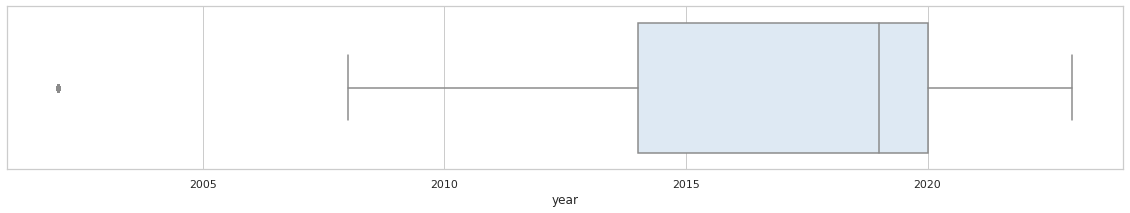

In [194]:
sns.set_theme(context='notebook', style='whitegrid', font_scale=1, color_codes=True)
sns.set_palette("Blues")
plt.figure(figsize = (20,3))
ax = sns.boxplot(data = dataset.query("year > 1950"), x = 'year')

*   100% of movies were released after ~2007;
*   75% were released after ~2014;
*   50 were released after ~2018;
*   25 were released after ~2020.

So the movies were released in last years.

## Year column Scatterplot

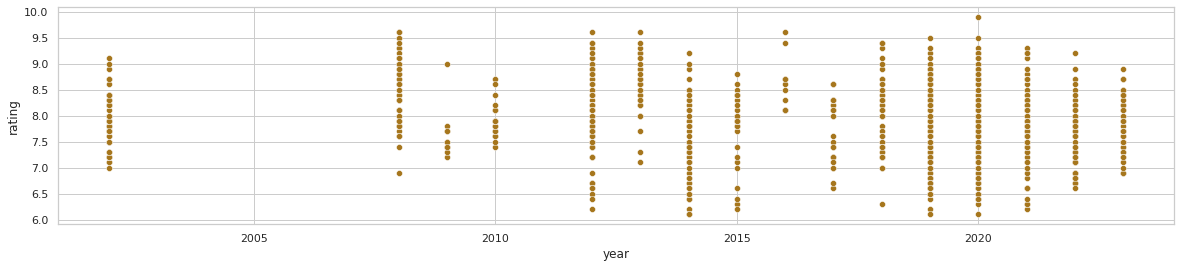

In [195]:
sns.set_theme(context='notebook', style='whitegrid', font_scale=1, color_codes=True)
sns.set_palette("Dark2_r")
plt.figure(figsize = (20,4))
ax = sns.scatterplot(data = dataset.query("year > 1950"), x = 'year', y = 'rating')